# TENSORFLOW

**Tensorflow**, Google tarafından geliştirilen açık kaynaklı bir makine öğrenimi ve derin öğrenme kütüphanesidir. Bu sunumlarda Tensorflow [sitesindeki](https://www.tensorflow.org/tutorials) eğitimlerin anlatılması hedeflenmektedir. Tensorflow ile [Google colab](https://colab.google/) üzerinden kolaylıkla çalışmalarınızı yapabilirsiniz. Kendi geliştirme ortamınızda çalışmalarınızı sürdürecekseniz Tensorflow'un şuanda Python 3.7-3.11 arasında olan versiyonları desteklediğini hatırlatmak istedim.

Tensorflow ile yapılacak eğitimlere geçmeden temel olarak bazı terimlere değinelim.

### 🧠Derin Öğrenme

İnsan beynindeki nöronlardan esinlenelerek geliştirilen yapay sinir ağlarını temel alan bir makine öğrenimi yöntemidir.

#### Sinir Ağlarının Temel Yapısı

Sinir ağları 4 temel yapıdan oluşur. Bunlar nöron, katman(layer), ağ(network) ve aktivasyon fonksiyonudur.

- **Nöron**: Temel hesaplama birimi.
- **Katman(Layer)**:Birden fazla nöronun bir araya gelmesiyle katmanlar oluşur.
- **Ağ(Network)**: Katmanların bir araya gelmesiyle oluşur.
- **Aktivasyon Fonksiyonu**: Nöronun çıktısını belirler. Temel aktivasyon fonksiyonları; relu, sigmoid olarak bilinir.



### TensorFlow ile Görüntü Sınıflandırma

Bu çalışmada makine öğrenmesi dünyasının "Hello Word" ü sayılabilecek Fashıon MNSIT veri seti ile görüntü sınıflandırma çalışması yapılacaktır.


In [2]:
#Kütüphaneleri import edelim

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # tensorflow kütüphane versiyonu

2.18.0


In [3]:
#veri setini içeri aktarma

fashion_mnist = tf.keras.datasets.fashion_mnist # Fashion MNIST veri setine erişim sağlanıyor.

#veri setini eğitim(train) ve test verisi olacak şekilde ayırarak veri setini yüklüyoruz.
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Fashion MNIST veri setinde kategoriler şu şekildedir.

- 0-T-shirt/top
- 1-Trouser(Pantolon)
- 2-Pullover(Kazak)
- 3-Dress(Elbise)
- 4-Coat(Palto)
- 5-Sandal
- 6-Shirt(Gömlek)
- 7-Sneaker(Spor Ayakkabı)
- 8-Bag(Çanta)
- 9-Ankle boot(Bot)

Bu veri setinde 0-9 arasında değişen etiketler görüntünün temsil ettiği kategoriye karşılık geliyor.

In [4]:
#veri seti kategorilerini ifade eden liste oluşturulur
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
              'Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
#eğitim veri setinin içeriğini öğrenelim.
# Bu kod çalıştırıldığıda eğitim veri setinin 28*28 piksel 60000 adet etiketten oluştuğu görülür.

train_images.shape

(60000, 28, 28)

In [6]:
#eğitim veri setinin uzunluğu
len(train_labels)

60000

In [7]:
#eğitim veri setinin içerisinde kategorilerin 0-9 arasınnda ifade edildiği görülür.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape


(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

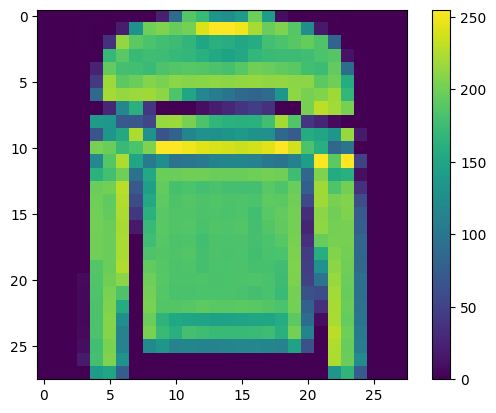

In [11]:
#eğitim veri setinde istediğiniz bir görüntüyü görselleştirin. Aşağıda 5.indexteki görüntüyü görüyorsunuz.

plt.figure
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()



Yukarıda görüldüğü gibi eğitim veri setinin 5.indexindeki görüntünün 0-255 arasındaki değerler ile gösteriliyor. Burada veriyi sinir ağı modeli ile beslemeden önce 0-1 arasına indirgememiz gerekiyor. Bu nedenle hem eğitim hem test verisinin 255'e bölerek 0-255 aralığı ile ifade edilen görüntüleri 0-1 arasına indireceğiz.

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

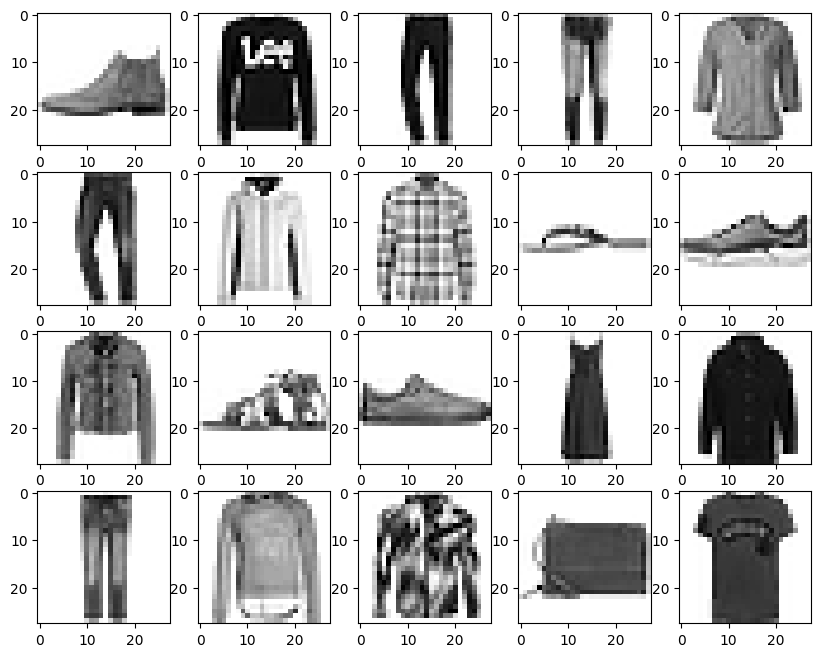

In [13]:
plt.figure(figsize=(10,10))
for i in range (20):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i],cmap=plt.cm.binary)

plt.show()

#bu kod bloğu çalııştırıldığında test verisinde görüntülerinin
# 0-1 arasında ölçeklendirildiği görülür.

## Modeli Oluşturma

Burada kadar veri setimizi inceledik. Veri setini 0-1 arasına indirgedik. Şimdi modeli oluşturma adımına geldik. Sunumun başında **Sinir Ağlarının** temellerinden bahsetmiştik. Bu uygulamada modelimizde **Dense** katmanı kullanılmıştır.

#### 🟡🟠🔴Dense(Tam Bağlantılı Katman)

Yapay sinir ağlarının en temel katmanlarından biridir. Matematiksel olarak **output = activation(dot(input,weights)+bias)** olarak ifade edilir. Burada activation için  yukarıda bahsettiğim aktivasyon fonksiyonlarından biri seçilir.

**tf.keras.layers**, Tensorflow'un yüksek seviyeli API'si olan Keras'ın bir modülüdür. Derin öğrenme modellerinde katmanları kolayca tanımlamak ve birleştirmek için kullanılır.  Sık kullanılan katmanlar **Dense** ve **Conv2D** katmanıdır. Bunlar sırasıyla **Tam Bağlantılı Katman** ve **Konvülasyon Katmanı** olarak bilinir.

Model oluşturulurken sırasıyla;

- **tf.keras.layers.Flatten** katmanı ile veriler (28x28 piksel) olan 2 boyutlu diziden (28*28 = 784 piksel) olan tek boyutlu diziye çevrilir.

- **tf.keras.layers.Dense** katmanı ile 128 nöronlu bir dense katmanı oluşturulur. İkinci katmanda 10 uzunluğunda bir lojik dizisi döndürür. Burada her düğüm geçerli görüntünün 10 sınıftan birine ait olduğunu gösteren puan içerir.




In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dense(10)

])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 🛠️Modeli Derleme

Model oluşturulduktan sonra modelin nasıl öğreneğinin belirlendiği adım olan model derleme adımına geçilir. Model derleme adımı 3 temel bileşenden oluşur.

- **Optimizer(İyileştirici)** : Model ağırlıklarının nasıl güncelleyeceğini belirler. Bu uygulamada yaygın olarak kullanılan 'adam' iyileştirici kullanılmıştır.

  - 'adam'
    - Her parametre için ayrı öğrenme oranı hesaplar.
    - Büyük gradientler için küçük, küçük gradientler için büyüm adımar atar.
    - Önceki gradientlerin ortalamasını alır.
    - İlk iterasyonlarda ortalamaları düzeltir.


- **Loss Function(Kayıp Fonksiyonu)** : Modelin tahminleri ile gerçek etiketler arasındaki farkı ölçer. Bu uygulamada **SparseCategoricalCrossentropy** kullanılmıştır. **Sparse** etiketler integer formatında, **CrossEntropy** olasılık dağılımları arasındaki uzaklığı ölçer. **from_logits=True** numerik kararlılık sağlar, bu sayede daha stabil gradient hesaplanır.

- **Metrics(Metrikler)**: Modelin performansını izlemek için kullanılır. **accuracy**, doğru tahminlerin toplam tahminlere oranını hesaplar.


In [15]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])


## Model Eğitimi

Model derleme adımından sonra model eğitim adımına geçilir. Model eğitim adımı 4 aşamadan oluşur.

1. Forward Pass(İleri Geçiş)
   - Model eğitim verilerini alır.(train_images, train_labels)
   - Katmanlar arası hesaplamalar yapar ve tahminler üretir.

2. Loss Hesaplama
   - Modelin tahminleri ve gerçek etiketler karşılaştırılır.
   - SparseCategoricalCrossentropy ile hata hesaplanır.

3. Backward Pass(Geri Yayılım)
   - Hata, katmanlar boyunca geriye doğru yayılır.
   - Her katmanın hataya katkısı hesaplanır.

4. Weight Update(Ağırlık Güncelleme)
   - Ağırlık hataları azaltacak şekilde güncellenir.


**model.fit** ile train_images ve train_labels verileri ile model eğitilir. Burada *epoch* iterasyonu ifade eder.

In [16]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7837 - loss: 0.6273
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8631 - loss: 0.3843
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8760 - loss: 0.3408
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8836 - loss: 0.3137
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8931 - loss: 0.2895
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8961 - loss: 0.2813
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9038 - loss: 0.2586
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9036 - loss: 0.2558
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9091 - loss: 0.2423
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9101 - loss: 0.2385


Modelin 9.epoch döngüsünden sonra %90 doğruluğa ulaştığı görülüyor.Bu modelin test verisindeki perfoması izlenir.

In [17]:
test_loss, test_acc = model.evaluate(test_images,test_labels, verbose=2)
print('\nTest Doğruluğu: ', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8836 - loss: 0.3359

Test Doğruluğu:  0.8835999965667725


Test sonucunun, eğitim veri setine göre daha düşük çıktığı görüldü. Burada eğitim veri seti ile **overfitting** aşırı öğrenme durumu olduğunda farklı veriler geldiğinde kötü performans gösterir.

## Tahmin

Eğitilmiş model ile artık yeni veriler üzerinden tahminler yapılabilir. Tahmin modeli oluşturulurken yeni bir aktivasyon fonksiyonu **Softmax** kullanılmıştır. **Softmax** çok sınıflı sınıflandırma problemlerinde kullanılan bir aktivasyon fonksiyonur. Bu fonksiyonda, tüm çıktıların toplamı her zaman 1 dir. Negatif değerler olmaz her çıktı 0-1 arasındadır. En yüksek logit değerini daha belirgin hale getirir.

In [18]:
prediction_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
#test verisindeki her görüntü için etiket tahmini
prediction = prediction_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
prediction[0]

array([8.6475723e-08, 3.4090295e-08, 2.3052440e-08, 2.1073243e-08,
       4.3907366e-07, 5.3432083e-04, 2.5593424e-06, 3.9858697e-03,
       1.2880600e-06, 9.9547535e-01], dtype=float32)

In [21]:
np.argmax(prediction[0])

np.int64(9)

In [22]:
test_labels[0]

np.uint8(9)

In [31]:
def plot_image(i,prediction_array,true_label,img):
  true_label,img = true_label[i],img[i]
  plt.grid(False)

  plt.imshow(img,cmap=plt.cm.binary)

  predicted_label = np.argmax(prediction_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(prediction_array),
                                         class_names[trure_label],
                                         color = color))


def plot_value_array(i,prediction_array,true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10),prediction_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)


  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

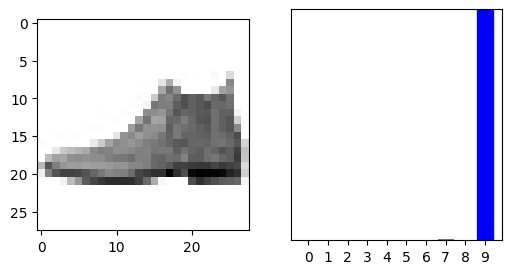

In [32]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i,prediction[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,prediction[i],test_labels)
plt.show()

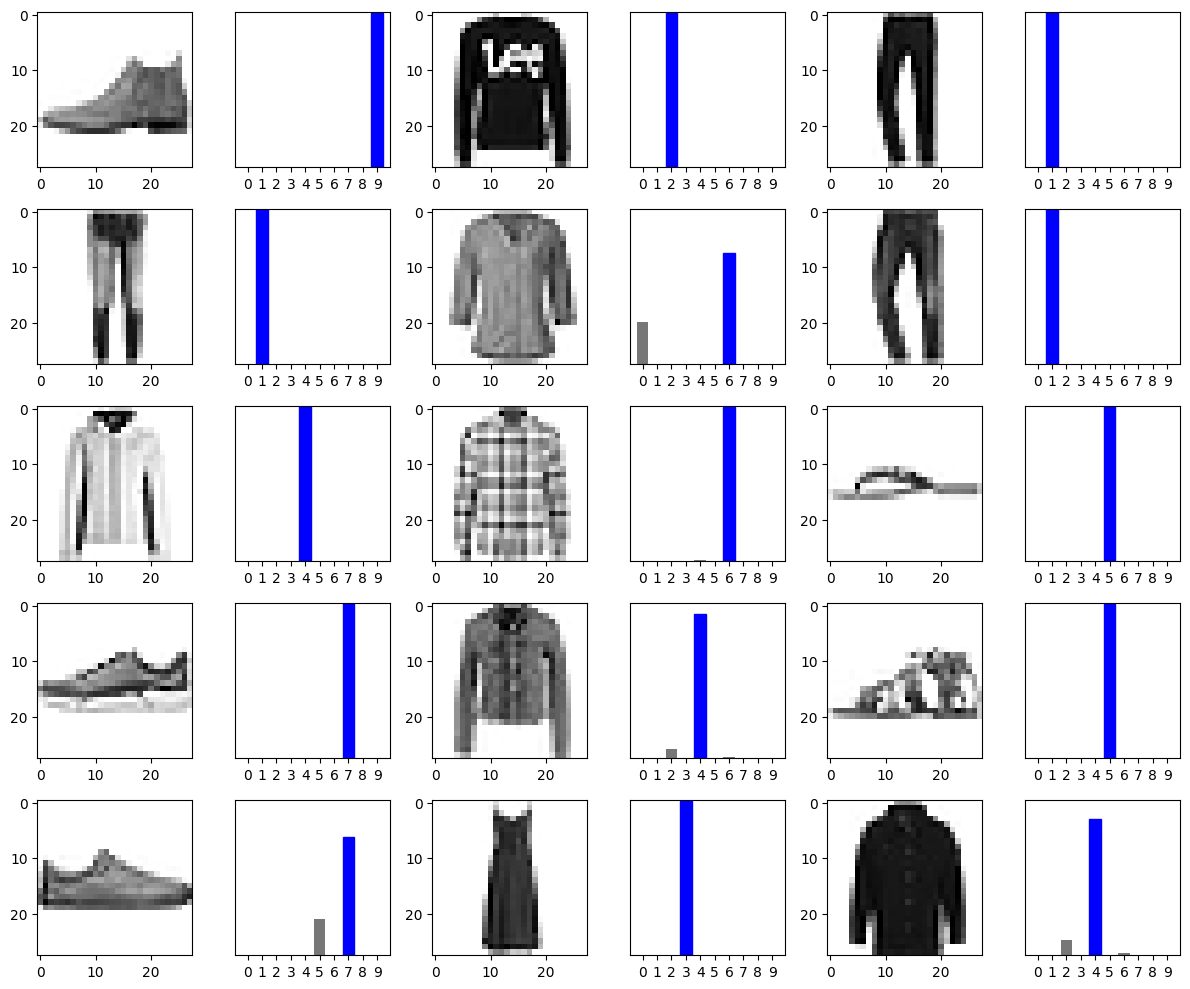

In [36]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_image(i,prediction[i],test_labels,test_images)
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_value_array(i,prediction[i],test_labels)
plt.tight_layout()
plt.show()


In [37]:
img = test_images[1]
print(img.shape)

(28, 28)


In [38]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)
